# Importando Bibliotecas

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Inicio Codigo

### Carregando os Dados

In [3]:
# Carregando dataset
df_desempenho = pd.read_csv('./dados/Desempenho.csv')

# Verificando os dados
df_desempenho.head()



,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,educ_mae,educ_pai,trab_mae,trab_pai,...,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,num_faltas,nota_periodo1,nota_periodo2,nota_final,#N/D
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,NaN
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,NaN
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,NaN
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,NaN


In [4]:

# Excluindo colunas mais 89% nulos
df_desempenho = df_desempenho.dropna(thresh=len(df_desempenho) * 0.89, axis=1)


# --- 3. Tratamento de valores nulos ---
for col in df_desempenho.columns:
    if df_desempenho[col].dtype == 'object':
        df_desempenho[col] = df_desempenho[col].fillna('não informado')
    else:
        df_desempenho[col] = df_desempenho[col].fillna(df_desempenho[col].median())


# --- 4. Pré-processamento ---
def preprocessamento(df):
    df_proc = df.copy()
    le = LabelEncoder()
    for col in df_proc.columns:
        if df_proc[col].dtype == 'object':
            df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    df_proc = df_proc.fillna(0)
    return df_proc
df_desempenho_proc = preprocessamento(df_desempenho)

### Grafico de Distribuição e contando o total de Colunas e linhas

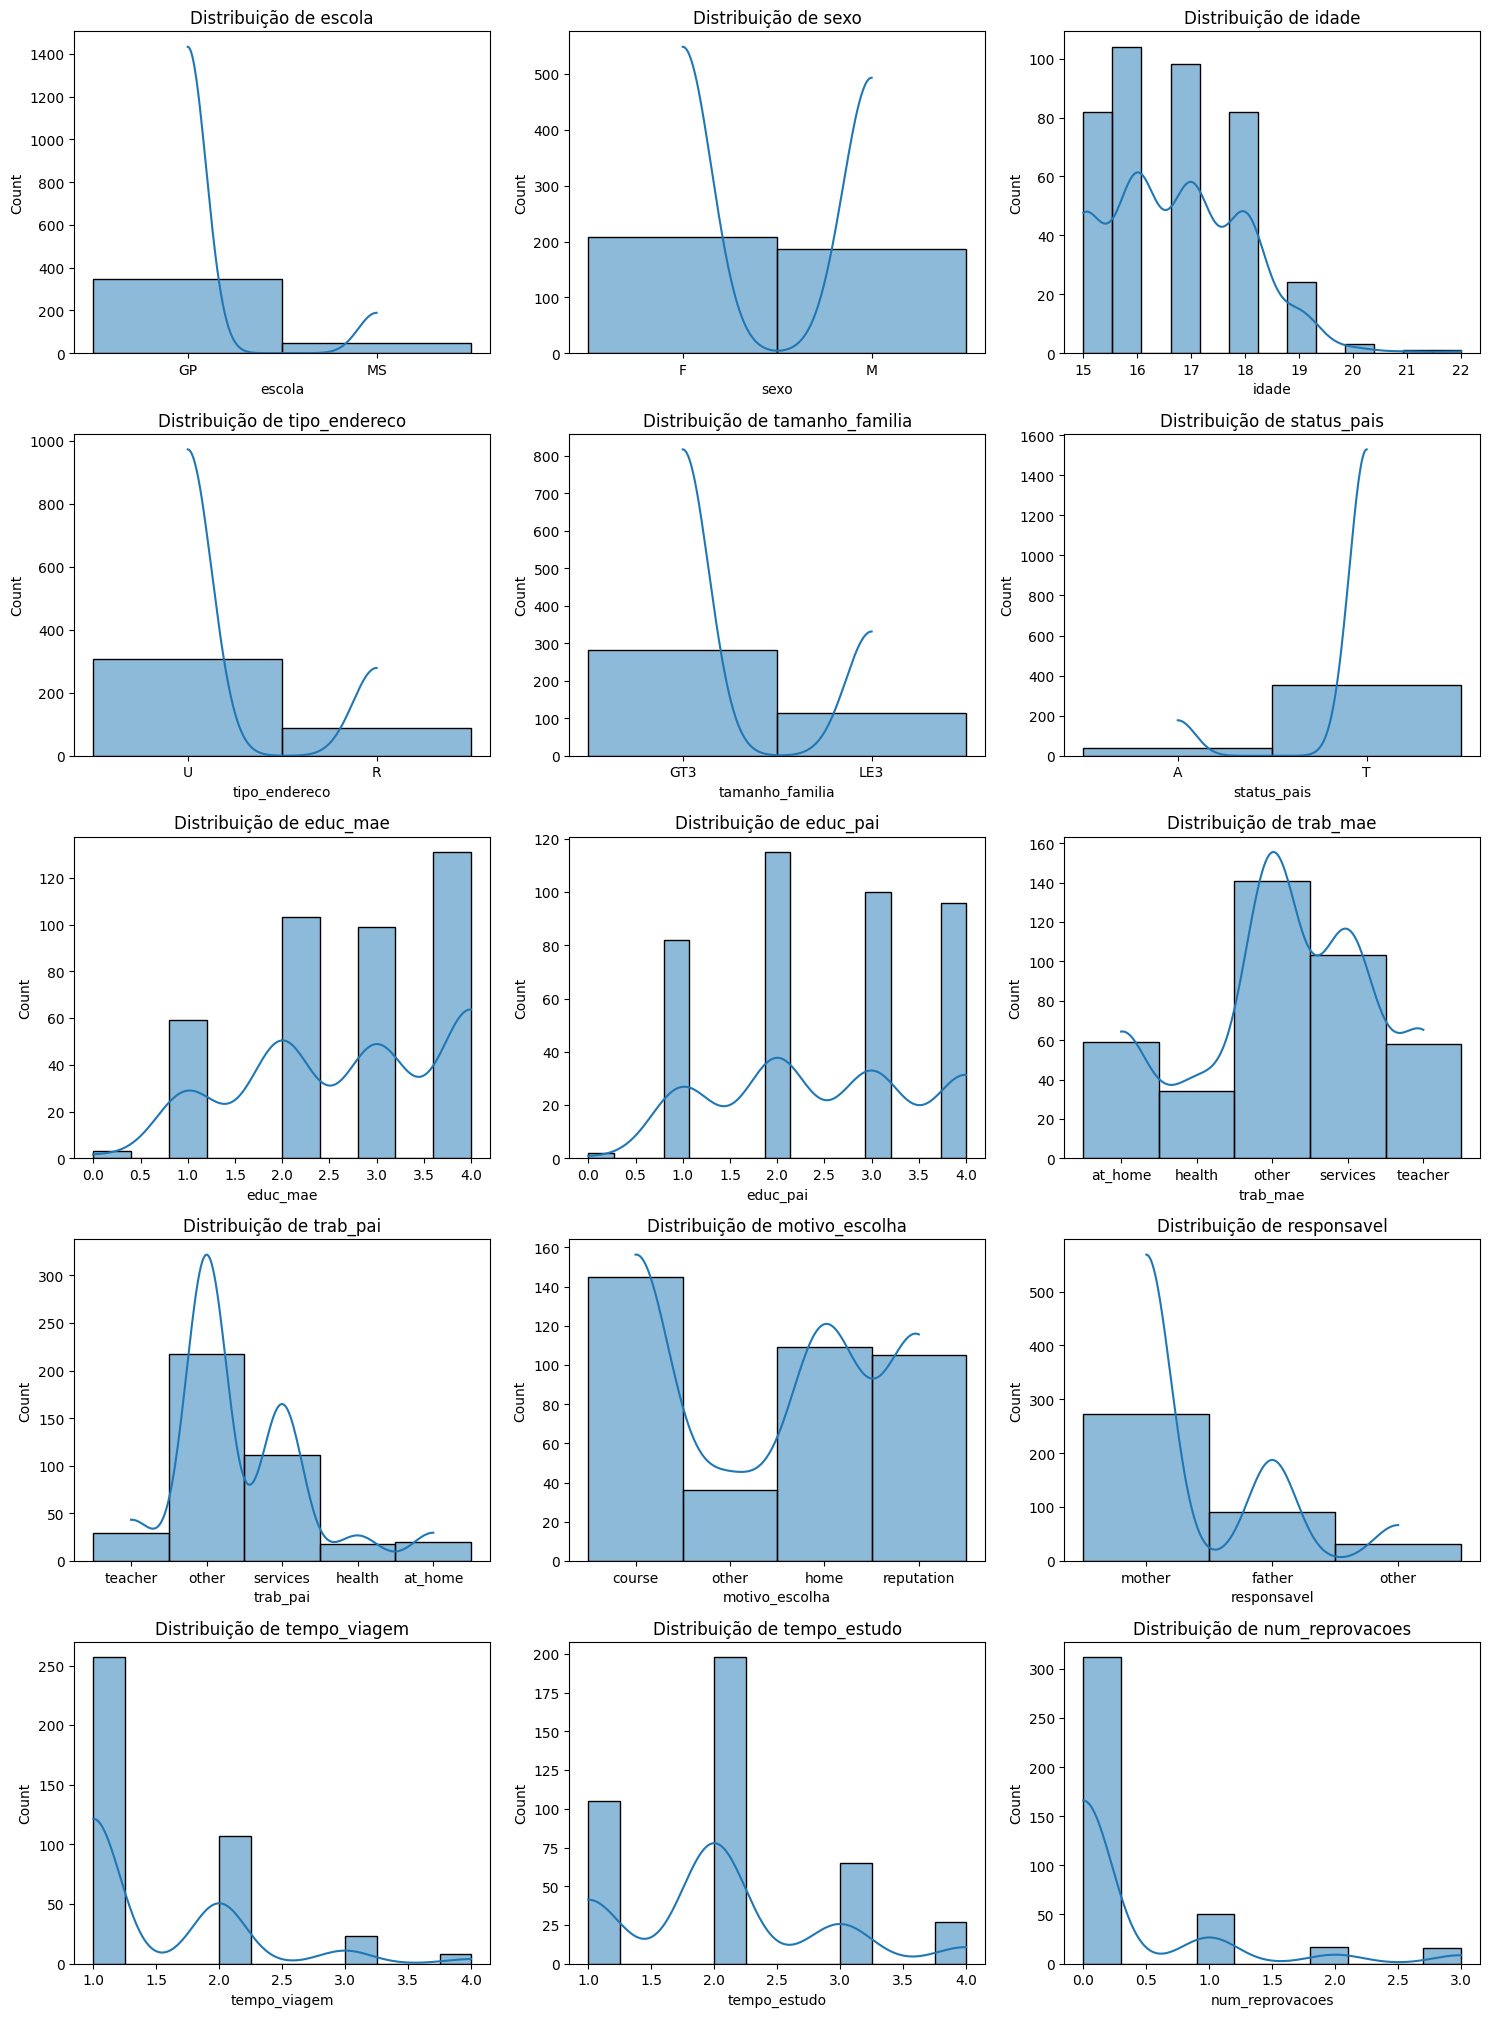

In [5]:
# Definir o número total de colunas
num_colunas = len(df_desempenho.columns)

# Calcular número de linhas necessário (supondo 3 colunas por linha)
num_linhas = math.ceil(num_colunas / 3)

# Criar a figura
plt.figure(figsize=(15, num_linhas * 4))

# Criar os subplots
for i, col in enumerate(df_desempenho.columns, 1):
    if i > 15:
        break  # Limitar a 15 gráficos
    
    plt.subplot(num_linhas, 3, i)  # Ajuste dinâmico
    sns.histplot(df_desempenho[col], kde=True)
    plt.title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

### Convertado todas as colunas categoricas em Numericas com LabelEncoder

In [6]:
def preprocessamento(df):
    df_proc = df.copy()
    le = LabelEncoder()
    for col in df_proc.columns:
        if df_proc[col].dtype == 'object':
            df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    df_proc = df_proc.fillna(0)
    return df_proc
df_desempenho_proc = preprocessamento(df_desempenho)

### Definindos os X e Y e passando o Treino

In [7]:
# Definindo as variáveis independentes (X) e dependentes (y)
# Aqui, 'nota_final' é a variável dependente que queremos prever
# e as demais colunas são as variáveis independentes

X = df_desempenho_proc.drop(['nota_final'], axis=1)
y = df_desempenho_proc['nota_final']

# Dividindo os dados em conjuntos de treino e teste pasando 80 para treino e 20 para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Modelo de Linear e Regressora

### Criando os modelos de Regressão Linear e Arvore de Decisão regressora 


In [26]:
#  Criar e treinar os modelos
lin_reg = LinearRegression().fit(X_train, y_train)
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Fazer previsões
y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)
y_pred_forest = random_forest_reg.predict(X_test)

# Avaliar os modelos

print("\nR² no conjunto de teste LinearRegression:", r2_score(y_test, y_pred_lin), 2)
print("\nR² no conjunto de teste DecisionTreeRegressor:", r2_score(y_test, y_pred_tree), 2)
print("\nR² no conjunto de teste RandomForestRegressor:", r2_score(y_test, y_pred_forest), 2)


R² no conjunto de teste LinearRegression: 0.7947708519011206 2

R² no conjunto de teste DecisionTreeRegressor: 0.7920382411143378 2

R² no conjunto de teste RandomForestRegressor: 0.8781777983732106 2


### Gerando o grafico de Comparação entre os modelos Linear e Regressora

In [27]:

def avaliar_modelo_regressao(nome, y_true, y_pred):
    print(f"\n📊 {nome}:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2%}")  # Convertendo em porcentagem
    

In [28]:
avaliar_modelo_regressao("Regressão Linear", y_test, y_pred_lin)
avaliar_modelo_regressao("Árvore de Decisão Regressora", y_test, y_pred_tree)
avaliar_modelo_regressao("Random Forest Regressor", y_test, y_pred_forest)


📊 Regressão Linear:
MAE: 1.40
RMSE: 2.12
R² Score: 79.48%

📊 Árvore de Decisão Regressora:
MAE: 1.14
RMSE: 2.14
R² Score: 79.20%

📊 Random Forest Regressor:
MAE: 0.99
RMSE: 1.64
R² Score: 87.82%


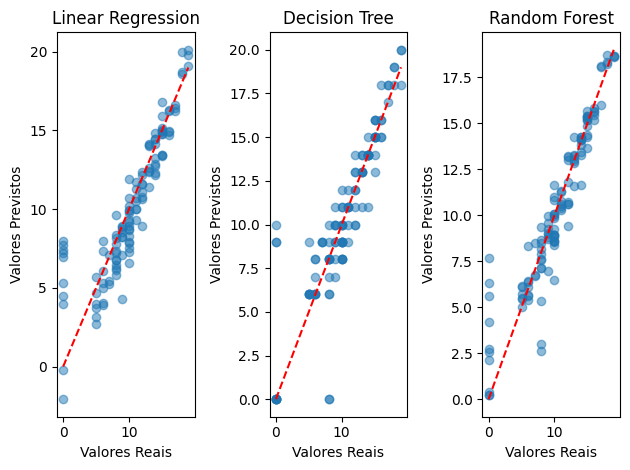

In [29]:
# Modelos e previsões
modelos = ["Linear Regression", "Decision Tree", "Random Forest"]
previsoes = [y_pred_lin, y_pred_tree, y_pred_forest]

# Criar um gráfico para cada modelo
for i, (modelo, y_pred) in enumerate(zip(modelos, previsoes)):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")  # Linha ideal
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.title(f"{modelo}")

plt.tight_layout()
plt.show()

# Modelo De Logistica e Classificadora

### Criando o modelo Regressão logistica e Arvore de Decisão classificadora


In [30]:
#  Carregar os dados
df = df_desempenho.copy()

#  Criar a variável categórica Aprovado/Reprovado
df['Aprovado'] = (df['nota_final'] >= 10).astype(int)  # 1 se aprovado, 0 se reprovado

# Remover a coluna nota_fianl (não queremos prever a nota, mas sim a classificação)
X = df.drop(columns=['nota_final', 'Aprovado'])
y = df['Aprovado']

# Converter variáveis categóricas para numéricas
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])


### Separando Treino e teste

In [31]:
# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar os modelos
log_reg = LogisticRegression().fit(X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)
random_forest_regressor = RandomForestClassifier(random_state=42).fit(X_train, y_train)
# Fazer previsões
y_pred_log = log_reg.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_forest = random_forest_regressor.predict(X_test)

print(set(y_test))  # Ver quais classes existem no conjunto de teste


{0, 1}


/var/data/python/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Chamando a Função De avaliar Modelo

In [32]:
def avaliar_modelo_classificacao(nome, y_true, y_pred):
    print(f"\n📊 {nome}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.2%}")
    print(f"Precisão: {precision_score(y_true, y_pred, average='macro', zero_division=1):.2%}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro', zero_division=1):.2%}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='macro', zero_division=1):.2%}")

In [33]:
avaliar_modelo_classificacao("Regressão Logística", y_test, y_pred_log)
avaliar_modelo_classificacao("Árvore de Decisão Classificadora", y_test, y_pred_tree)
avaliar_modelo_classificacao("Random Forest Classificadora", y_test, y_pred_forest)


📊 Regressão Logística:
Acurácia: 93.67%
Precisão: 92.68%
Recall: 93.41%
F1-Score: 93.03%

📊 Árvore de Decisão Classificadora:
Acurácia: 93.67%
Precisão: 92.68%
Recall: 93.41%
F1-Score: 93.03%

📊 Random Forest Classificadora:
Acurácia: 91.14%
Precisão: 89.63%
Recall: 91.49%
F1-Score: 90.39%


### Gerando a Comparação Visual

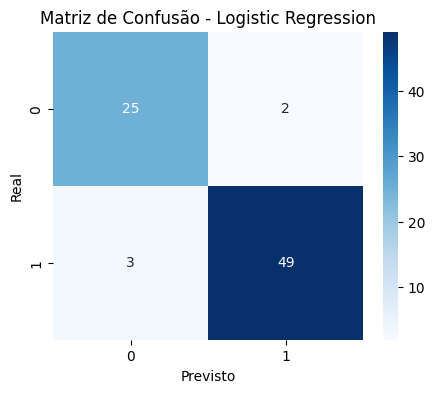

Relatório de Classificação - Logistic Regression
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79



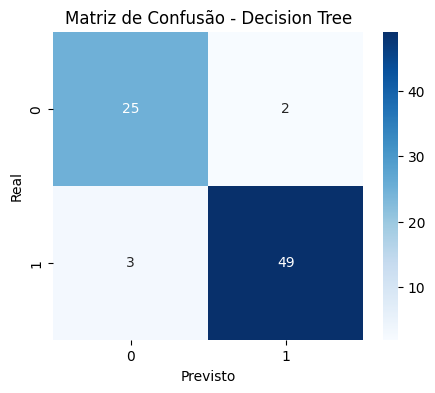

Relatório de Classificação - Decision Tree
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79



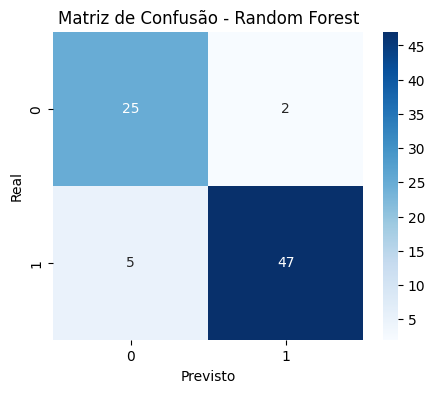

Relatório de Classificação - Random Forest
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79



In [34]:
# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()
    print(f"Relatório de Classificação - {model_name}\n", classification_report(y_true, y_pred))

# Gerar matrizes de confusão para cada modelo
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")